In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as sklm 
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df_all = pd.read_csv('ward-atlas-data-simpleversion.csv')

In [3]:
df = df_all[[
    'Diversity; Ethnic Group 5 groups - 2011 Census; White',
    'Diversity; Ethnic Group 5 groups - 2011 Census; Mixed',
    'Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British',
    'Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British',
    'Diversity; Ethnic Group 5 groups - 2011 Census; Other',
    'House Prices; Median House Price; 2011',
    'Population and Age; All ages; 2011'
]]

In [4]:
df[['white']]=df[['Diversity; Ethnic Group 5 groups - 2011 Census; White']].values/df[['Population and Age; All ages; 2011']]
df[['mixed']] = df[['Diversity; Ethnic Group 5 groups - 2011 Census; Mixed']].values/df[['Population and Age; All ages; 2011']]
df[['asian']] = df[['Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British']].values/df[['Population and Age; All ages; 2011']]
df[['black']] = df[['Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British']].values/df[['Population and Age; All ages; 2011']]
df[['other']] = df[['Diversity; Ethnic Group 5 groups - 2011 Census; Other']].values/df[['Population and Age; All ages; 2011']]
df[['house_price']]= df[['House Prices; Median House Price; 2011']]

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [5]:
df = df[[
    'white',
    'mixed',
    'asian',
    'black',
    'other',
    'house_price',
]]

In [6]:
# normalisation
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [7]:
df.rename(columns={0: 'white', 1: 'mixed',2:'asian',3:'black',4:'other',5:'house_price'})

,white,mixed,asian,black,other,house_price
0,0.804693,0.313008,0.144621,0.038415,0.093724,0.211656
1,0.239475,0.384274,0.530941,0.391273,0.130859,0.034969
2,0.707467,0.260891,0.074020,0.351123,0.039053,0.024540
3,0.584531,0.386496,0.203324,0.341017,0.064770,0.030675
4,0.623082,0.409372,0.180732,0.304971,0.074652,0.046012
...,...,...,...,...,...,...
620,0.801219,0.244770,0.100759,0.092450,0.188908,0.242331
621,0.719861,0.395479,0.142697,0.131117,0.241147,0.294479
622,0.778693,0.313246,0.109716,0.091699,0.235907,0.288344
623,0.459961,0.642111,0.163815,0.282873,0.870886,0.180982


## Silhouette Coefficients or silhouette scores with different cluster numbers

In [14]:
#silhoutte Score and elbow 
silhoutte_scores=[]#silhoutte Score
#intra_sum_of_square_list = [] #elbow
X = df
clusters = range(2,21)

for k in clusters:
    km = KMeans(n_clusters=k)
    labels = km.fit(X).labels_
    score = silhouette_score(X,labels)
    silhoutte_scores.append(score) #silhoutte Score
    #intra_sum_of_square_list.append(km.inertia_) #elbow

Text(0, 0.5, 'silhoutte Score')

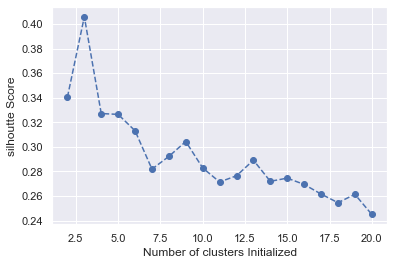

In [16]:
plt.plot(clusters, silhoutte_scores, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters Initialized')
plt.ylabel('silhoutte Score')

In [12]:
# silhoutte_scores from clusters = 2 to clusters = 21
silhoutte_scores

[0.34042982900040414,
 0.4058737672321754,
 0.32636410675560673,
 0.326354344587619,
 0.3104770796536479,
 0.28405272359388745,
 0.28955588281886974,
 0.2687103647431373,
 0.27264188333430445,
 0.29970215522039145,
 0.28945374894338527,
 0.28119923508986266,
 0.26986265262576364,
 0.27181182333735604,
 0.26969609534627353,
 0.25550364500226325,
 0.25776306576220587,
 0.26821441971563253,
 0.2575052298695421]

### When number of clusters =  3, with highest silhoutte_score

## PCA

In [8]:
#scaler = StandardScaler()
#segmentation_std = scaler.fit_transform(df)

In [11]:
pca = PCA()
pca.fit(df)

PCA()

In [12]:
pca.explained_variance_ratio_

array([4.83836942e-01, 3.31783638e-01, 1.12985260e-01, 4.58253691e-02,
       2.55375125e-02, 3.12792843e-05])

Text(0, 0.5, 'Cumulative explained variance')

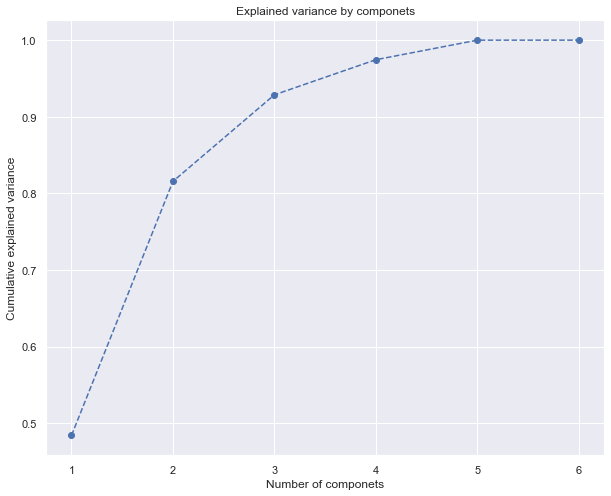

In [13]:
plt.figure(figsize = (10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by componets')
plt.xlabel('Number of componets')
plt.ylabel('Cumulative explained variance')

## Try 2 components


In [14]:
pca = PCA(n_components = 2)

In [16]:
pca.fit(df)

PCA(n_components=2)

In [21]:
pca.transform(df)

array([[-0.31263843,  0.05553519],
       [ 0.43702663,  0.26744547],
       [-0.12195886, -0.0612936 ],
       ...,
       [-0.26526127,  0.01088894],
       [ 0.29842879, -0.15701808],
       [-0.14158619,  0.00087538]])

In [22]:
scores_pca = pca.transform(df)

In [23]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


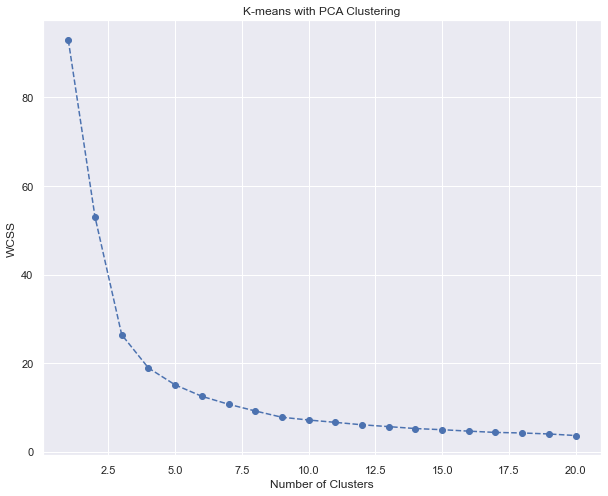

In [24]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Text(0, 0.5, 'silhoutte Score')

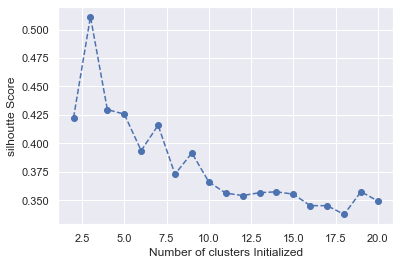

In [25]:
#silhoutte Score and elbow 
silhoutte_scores2=[]#silhoutte Score
#intra_sum_of_square_list = [] #elbow
X2 = scores_pca
clusters = range(2,21)

for k in clusters:
    km = KMeans(n_clusters=k)
    labels = km.fit(X2).labels_
    score = silhouette_score(X2,labels)
    silhoutte_scores2.append(score) #silhoutte Score
    #intra_sum_of_square_list.append(km.inertia_) #elbow
    
plt.plot(clusters, silhoutte_scores2, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters Initialized')
plt.ylabel('silhoutte Score')

In [26]:
silhoutte_scores2

[0.42247767453269136,
 0.5112365784227119,
 0.4296309598939548,
 0.4256524998662322,
 0.39349440247471,
 0.415924807546852,
 0.37286168597744407,
 0.3914672030171313,
 0.3660736778445798,
 0.3562220297578593,
 0.3540968246108872,
 0.35662627889399107,
 0.35737521244448756,
 0.35531185123920933,
 0.3452130036828851,
 0.3451964185471098,
 0.3375100845440805,
 0.35746169694397967,
 0.34930276256484344]

### And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 3 clusters mark. So, we’ll be keeping a 3-cluster solution.

In [27]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 50)

In [28]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=50)

In [29]:
scores_pca.shape

(625, 2)

In [30]:
pd.DataFrame(scores_pca)

,0,1
0,-0.312638,0.055535
1,0.437027,0.267445
2,-0.121959,-0.061294
3,0.049853,-0.013826
4,0.005356,-0.037159
...,...,...
620,-0.309807,0.040626
621,-0.165218,-0.016429
622,-0.265261,0.010889
623,0.298429,-0.157018


## Analyze the Results of PCA and K-Means Clustering

In [31]:
PAC_Score = pd.DataFrame(scores_pca)
PAC_Score.rename(columns={0:'Component 1',1:'Component 2'})#,2:'Component 3'})

,Component 1,Component 2
0,-0.312638,0.055535
1,0.437027,0.267445
2,-0.121959,-0.061294
3,0.049853,-0.013826
4,0.005356,-0.037159
...,...,...
620,-0.309807,0.040626
621,-0.165218,-0.016429
622,-0.265261,0.010889
623,0.298429,-0.157018


In [32]:
df_segm_pca_kmeans = pd.concat([df, PAC_Score], axis=1,ignore_index=True).rename(columns={0: 'white', 1: 'mixed',2:'asian',3:'black',4:'other',5:'house_price',6:'Component 1',7:'Component 2'})#,8:'Component 3'})
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans

,white,mixed,asian,black,other,house_price,Component 1,Component 2,Segment K-means PCA
0,0.804693,0.313008,0.144621,0.038415,0.093724,0.211656,-0.312638,0.055535,1
1,0.239475,0.384274,0.530941,0.391273,0.130859,0.034969,0.437027,0.267445,0
2,0.707467,0.260891,0.074020,0.351123,0.039053,0.024540,-0.121959,-0.061294,1
3,0.584531,0.386496,0.203324,0.341017,0.064770,0.030675,0.049853,-0.013826,2
4,0.623082,0.409372,0.180732,0.304971,0.074652,0.046012,0.005356,-0.037159,1
...,...,...,...,...,...,...,...,...,...
620,0.801219,0.244770,0.100759,0.092450,0.188908,0.242331,-0.309807,0.040626,1
621,0.719861,0.395479,0.142697,0.131117,0.241147,0.294479,-0.165218,-0.016429,1
622,0.778693,0.313246,0.109716,0.091699,0.235907,0.288344,-0.265261,0.010889,1
623,0.459961,0.642111,0.163815,0.282873,0.870886,0.180982,0.298429,-0.157018,2


In [33]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({
    0:'first',
    1:'second',
    2:'third',
    #3:'fouth'
})

In [34]:
df_segm_pca_kmeans

,white,mixed,asian,black,other,house_price,Component 1,Component 2,Segment K-means PCA,Segment
0,0.804693,0.313008,0.144621,0.038415,0.093724,0.211656,-0.312638,0.055535,1,second
1,0.239475,0.384274,0.530941,0.391273,0.130859,0.034969,0.437027,0.267445,0,first
2,0.707467,0.260891,0.074020,0.351123,0.039053,0.024540,-0.121959,-0.061294,1,second
3,0.584531,0.386496,0.203324,0.341017,0.064770,0.030675,0.049853,-0.013826,2,third
4,0.623082,0.409372,0.180732,0.304971,0.074652,0.046012,0.005356,-0.037159,1,second
...,...,...,...,...,...,...,...,...,...,...
620,0.801219,0.244770,0.100759,0.092450,0.188908,0.242331,-0.309807,0.040626,1,second
621,0.719861,0.395479,0.142697,0.131117,0.241147,0.294479,-0.165218,-0.016429,1,second
622,0.778693,0.313246,0.109716,0.091699,0.235907,0.288344,-0.265261,0.010889,1,second
623,0.459961,0.642111,0.163815,0.282873,0.870886,0.180982,0.298429,-0.157018,2,third


### From the silhoutte_scores plot, if we choose number of clusters = 3, there comes to best clustering, with Silhouette Score: 0.4058737672321754 FOR df

In [35]:
silhouette_kmeans = sklm.silhouette_score(df,KMeans(n_clusters=3).fit(df).labels_)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.4058737672321754


### From the silhoutte_scores plot, if we choose number of clusters = 3, there comes to better clustering, with Silhouette Score: 0.4233654672160375 FOR scores_pca, which is components after PCA

In [37]:
silhouette_kmeans = sklm.silhouette_score(scores_pca,KMeans(n_clusters=3).fit(scores_pca).labels_)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.5112365784227119


## Visualize Clusters by Components

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


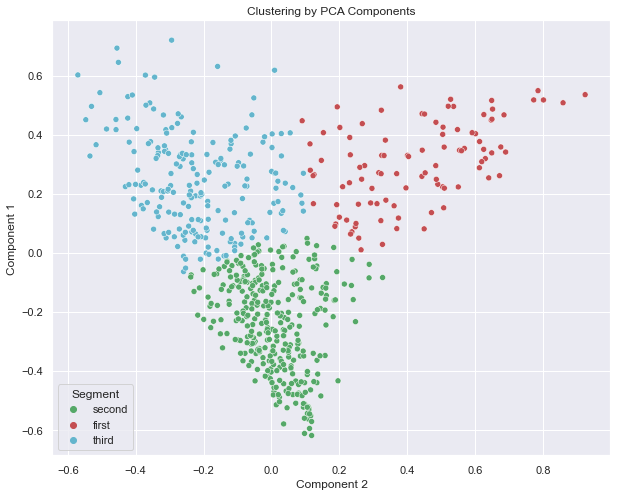

In [38]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g','r','c'])
plt.title('Clustering by PCA Components')
plt.show()

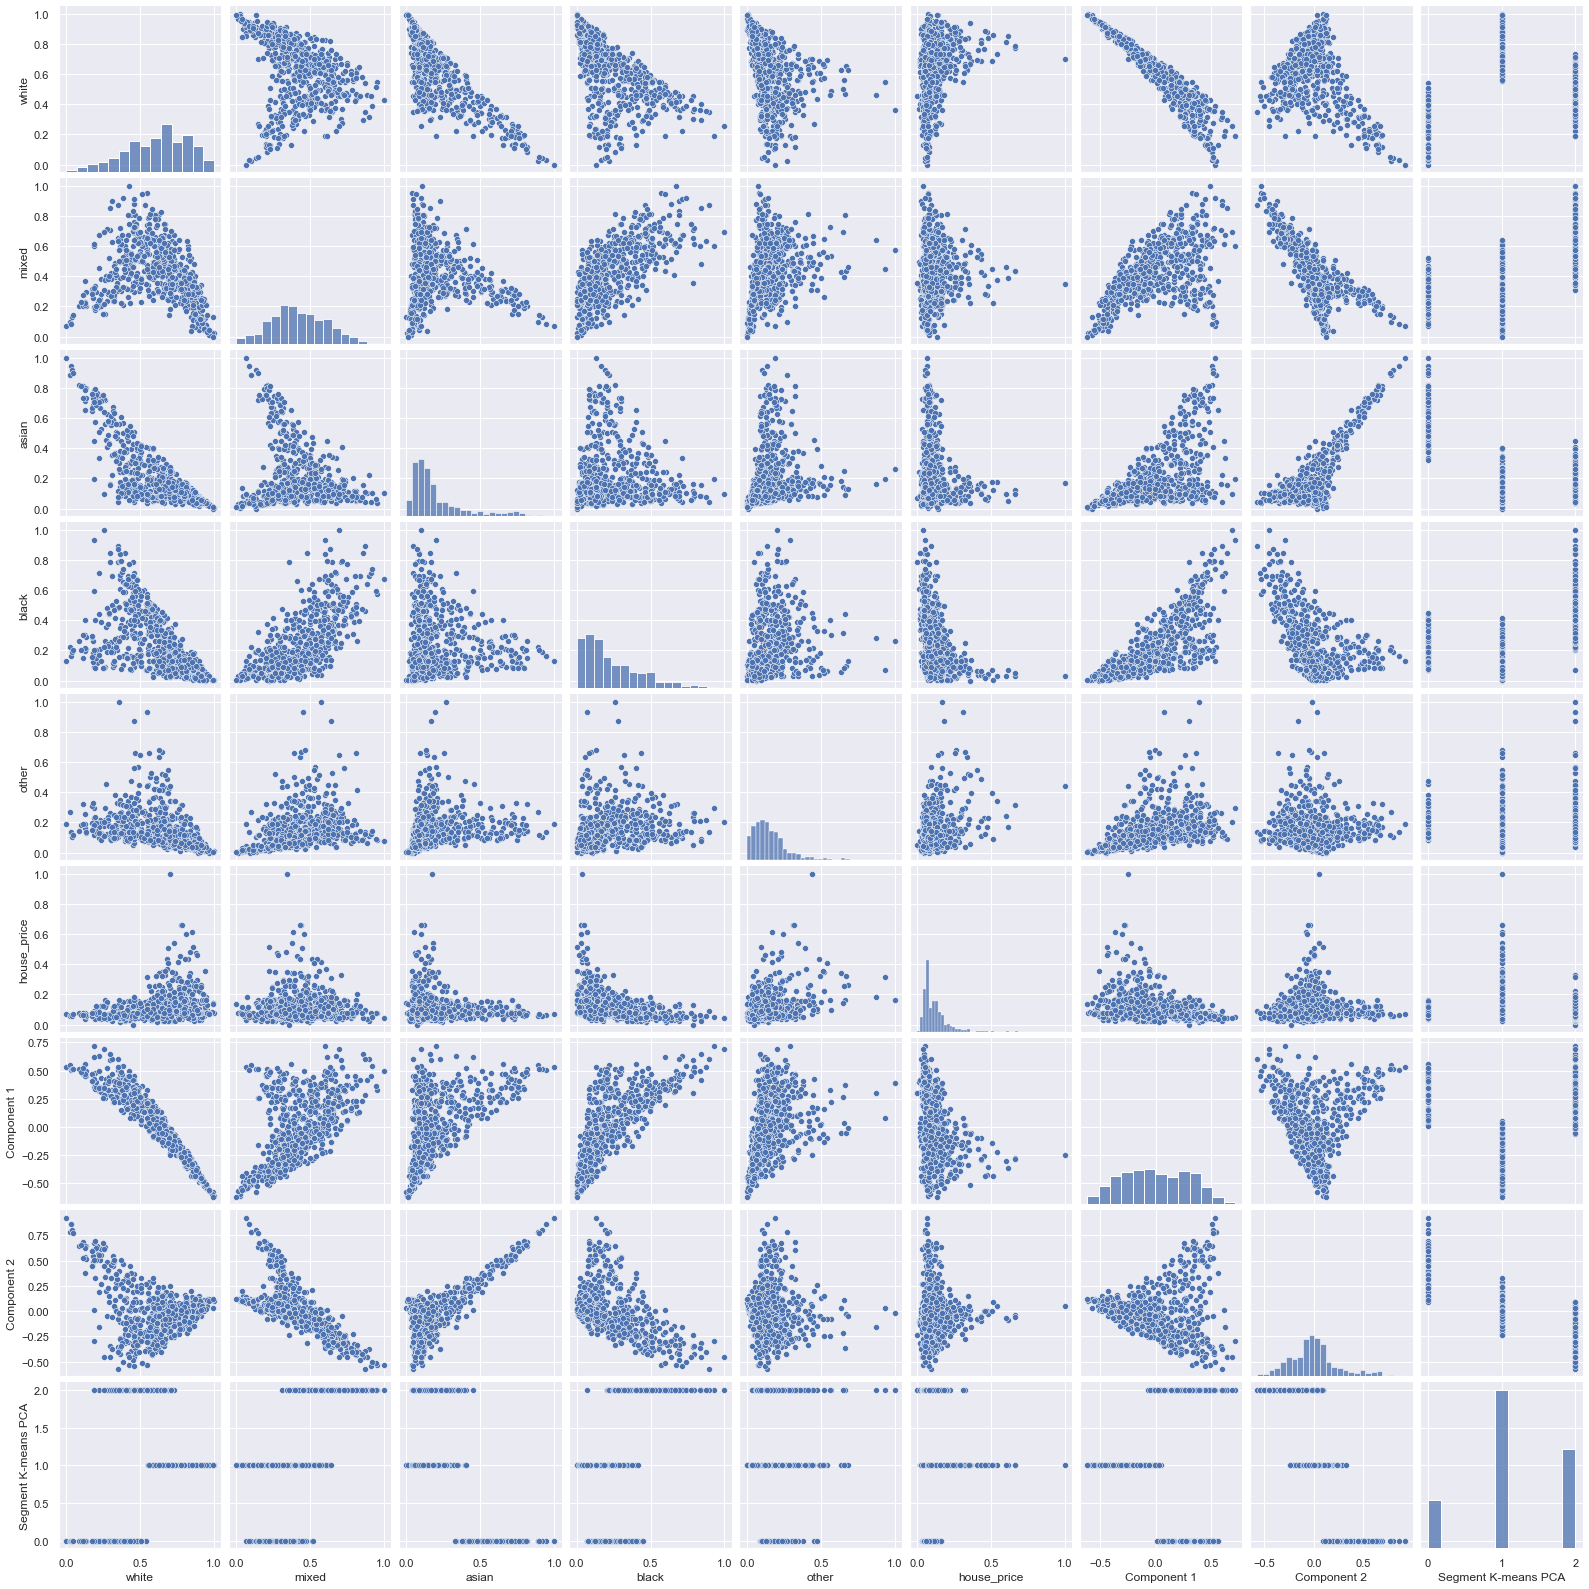

In [39]:
sns.pairplot(df_segm_pca_kmeans)